In [1]:
import numpy as np
from kan import *
import torch
import matplotlib.pyplot as plt

In [2]:
from kan import *

# Define the target function f(phi, Reα, Imα) for ⟨G⟩ based on our known Wigner
f = lambda x: torch.cos(x[:,[0]]) * (1.0 + x[:,[1]]) + torch.sin(x[:,[0]]) * (0.5 + x[:,[2]])
# Create dataset dict for PyKAN (train/test split)
dataset = create_dataset(f, n_var=3, ranges=np.array([[0, 2*np.pi],[-3,3],[-3,3]]),
                               train_num=800, test_num=200, normalize_input=False)

# Initialize KAN model with 3 inputs, width 5, and 1 output
model = KAN(width=[3, 4, 1], grid=5, k=3, seed=5)
# Train the model (e.g. using LBFGS optimizer for quick convergence)
model.fit(dataset, opt='LBFGS', steps=200, lamb=1e-3)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.39e-02 | test_loss: 3.14e-02 | reg: 1.62e+01 | : 100%|█| 200/200 [02:07<00:00,  1.57

saving model version 0.1


{'train_loss': [array(0.75348014, dtype=float32),
  array(0.47642282, dtype=float32),
  array(0.37839803, dtype=float32),
  array(0.31250668, dtype=float32),
  array(0.26316133, dtype=float32),
  array(0.22375481, dtype=float32),
  array(0.1779657, dtype=float32),
  array(0.15579794, dtype=float32),
  array(0.14265129, dtype=float32),
  array(0.12914877, dtype=float32),
  array(0.11730874, dtype=float32),
  array(0.10890176, dtype=float32),
  array(0.1000396, dtype=float32),
  array(0.09341206, dtype=float32),
  array(0.08826571, dtype=float32),
  array(0.08495501, dtype=float32),
  array(0.08222574, dtype=float32),
  array(0.08075571, dtype=float32),
  array(0.07794143, dtype=float32),
  array(0.07622933, dtype=float32),
  array(0.0741296, dtype=float32),
  array(0.07111451, dtype=float32),
  array(0.06966218, dtype=float32),
  array(0.06681673, dtype=float32),
  array(0.06367291, dtype=float32),
  array(0.06310301, dtype=float32),
  array(0.06164576, dtype=float32),
  array(0.0605406

In [3]:
print(dataset.keys())
print(shape(dataset.get('test_input')))
print(dataset.get('test_input'))

dict_keys(['train_input', 'test_input', 'train_label', 'test_label'])
torch.Size([200, 3])
tensor([[ 4.5392e+00,  4.4811e-01, -1.3248e+00],
        [ 1.7988e+00,  1.3310e-02, -2.1583e+00],
        [ 5.6461e+00, -2.1772e+00,  4.6795e-01],
        [ 9.3720e-01,  6.9642e-01, -4.1939e-01],
        [ 3.1505e+00, -2.2054e+00,  1.4575e-01],
        [ 5.9656e+00,  1.4556e+00,  1.3013e+00],
        [ 6.2655e+00, -1.7874e+00,  1.2595e+00],
        [ 1.3218e+00, -9.7995e-01, -9.4649e-01],
        [ 3.7012e+00, -1.4228e+00,  2.0604e-01],
        [ 3.5127e+00,  2.3679e+00,  7.1264e-01],
        [ 1.6687e+00, -2.1127e+00,  6.3859e-02],
        [ 2.0562e+00,  1.5318e+00,  6.0033e-01],
        [ 3.9925e+00,  1.5046e+00, -1.2153e+00],
        [ 9.5704e-01,  2.1212e+00,  2.4590e+00],
        [ 3.6599e+00,  7.5166e-01, -3.0771e-01],
        [ 4.5010e+00,  1.6354e+00, -3.8384e-01],
        [ 1.9036e+00,  2.3715e+00, -2.6925e+00],
        [ 5.7511e+00,  5.9093e-01, -2.1746e+00],
        [ 2.9348e+00,  1.02

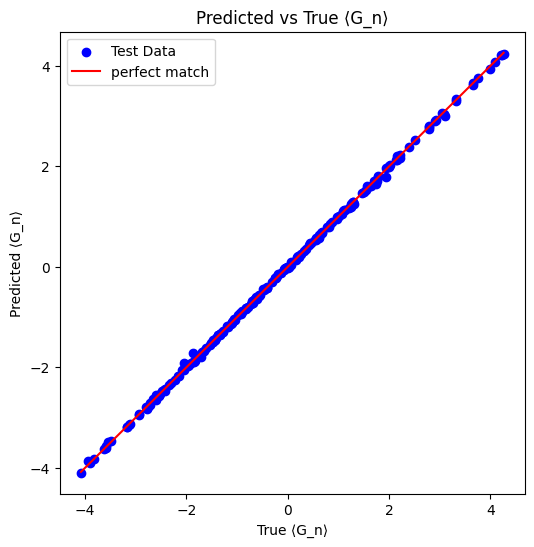

In [4]:
import matplotlib.pyplot as plt

# Use the correct keys for the test data
X_test_tensor = dataset['test_input']
y_test_tensor = dataset['test_label']

# Predict using the model (assuming the model has a predict method)
y_pred_tensor = model(X_test_tensor)

# Convert tensors to NumPy arrays for plotting
y_test = y_test_tensor.cpu().detach().numpy().ravel()
y_pred = y_pred_tensor.cpu().detach().numpy().ravel()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, label='Test Data', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', label='perfect match')
plt.xlabel('True ⟨G_n⟩')
plt.ylabel('Predicted ⟨G_n⟩')
plt.title('Predicted vs True ⟨G_n⟩')
plt.legend()
plt.show()

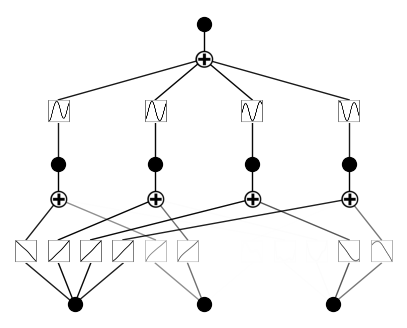

In [5]:
model.plot()

In [6]:
model = model.prune()

saving model version 0.2


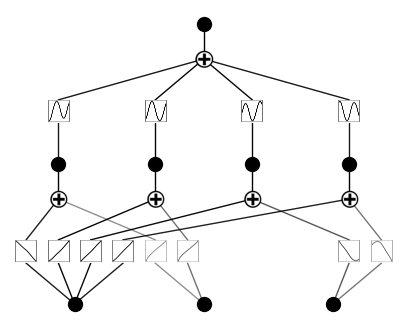

In [7]:
model.plot()

In [8]:
model.auto_symbolic(a_range=(-20,20))

fixing (0,0,0) with x, r2=0.9952941536903381, c=1
fixing (0,0,1) with x, r2=0.9968222379684448, c=1
fixing (0,0,2) with x, r2=0.9988030791282654, c=1
fixing (0,0,3) with x, r2=0.9992605447769165, c=1
fixing (0,1,0) with x, r2=0.99155193567276, c=1
fixing (0,1,1) with x, r2=0.9933441281318665, c=1
fixing (0,1,2) with 0
fixing (0,1,3) with 0
fixing (0,2,0) with 0
fixing (0,2,1) with 0
fixing (0,2,2) with cos, r2=0.9983985424041748, c=2
fixing (0,2,3) with cos, r2=0.9991236925125122, c=2
fixing (1,0,0) with cos, r2=0.9961121082305908, c=2
fixing (1,1,0) with cos, r2=0.9981723427772522, c=2
fixing (1,2,0) with 0, r2=0.0, c=0
fixing (1,3,0) with cos, r2=0.9981540441513062, c=2
saving model version 0.3


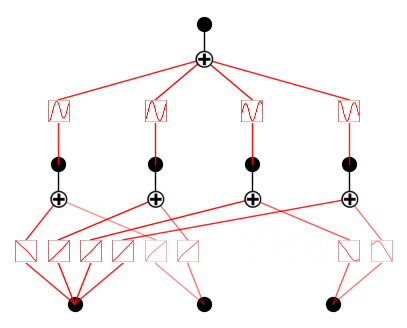

In [9]:
model.plot()

In [10]:
model.fit(dataset, opt='LBFGS', steps=100, lamb=1e-3)

| train_loss: 8.31e-02 | test_loss: 8.14e-02 | reg: 0.00e+00 | : 100%|█| 100/100 [01:28<00:00,  1.13

saving model version 0.4


{'train_loss': [array(0.7826241, dtype=float32),
  array(0.65340376, dtype=float32),
  array(0.5581786, dtype=float32),
  array(0.53112394, dtype=float32),
  array(0.49346504, dtype=float32),
  array(0.4233758, dtype=float32),
  array(0.40648374, dtype=float32),
  array(0.39929235, dtype=float32),
  array(0.3959185, dtype=float32),
  array(0.39517367, dtype=float32),
  array(0.39154503, dtype=float32),
  array(0.3908745, dtype=float32),
  array(0.3891314, dtype=float32),
  array(0.38520533, dtype=float32),
  array(0.37539825, dtype=float32),
  array(0.35557675, dtype=float32),
  array(0.35462725, dtype=float32),
  array(0.35323828, dtype=float32),
  array(0.34978458, dtype=float32),
  array(0.3487613, dtype=float32),
  array(0.3471796, dtype=float32),
  array(0.34508836, dtype=float32),
  array(0.342175, dtype=float32),
  array(0.3398173, dtype=float32),
  array(0.33628234, dtype=float32),
  array(0.28605, dtype=float32),
  array(0.26243535, dtype=float32),
  array(0.24651869, dtype=fl

In [11]:
formula = model.symbolic_formula()[0][0]
print(formula)

-15.9426393508911*cos(-1.00478957273679*x_1 + 0.0205474385621684*x_2 + 0.765337704081568) + 16.1876258850098*cos(1.00342505170375*x_1 - 7.92197047214734*cos(0.0125573324039578*x_3 + 5.61705780029297) + 6.20298675336191) - 11.7440214157104*cos(1.00495513506753*x_1 + 0.0687822626288345*x_2 - 5.0271018085197) + 0.0115881040692329


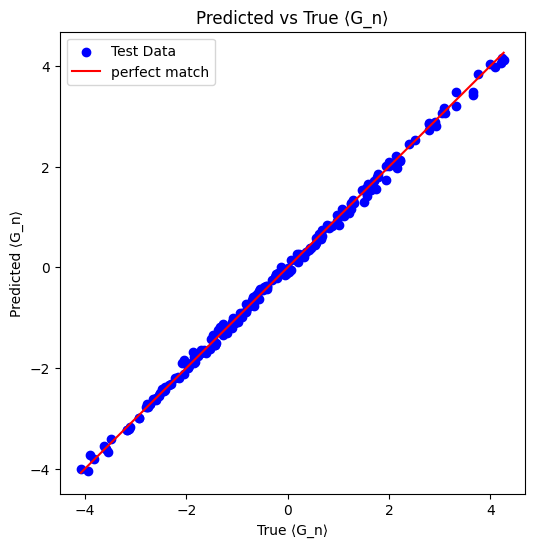

In [12]:
import matplotlib.pyplot as plt

# Use the correct keys for the test data
X_test_tensor = dataset['test_input']
y_test_tensor = dataset['test_label']

# Predict using the model (assuming the model has a predict method)
y_pred_tensor = model(X_test_tensor)

# Convert tensors to NumPy arrays for plotting
y_test = y_test_tensor.cpu().detach().numpy().ravel()
y_pred = y_pred_tensor.cpu().detach().numpy().ravel()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, label='Test Data', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', label='perfect match')
plt.xlabel('True ⟨G_n⟩')
plt.ylabel('Predicted ⟨G_n⟩')
plt.title('Predicted vs True ⟨G_n⟩')
plt.legend()
plt.show()

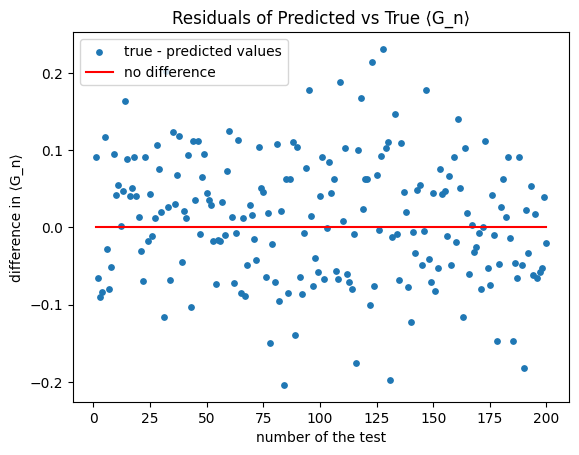

-0.20383263
83
-0.20383263
-1.8355513


-2.039384

In [13]:
x_range = np.arange(1,201)
y0 = np.zeros(200)
plt.figure()
#plt.plot(x_range, y_test-y_pred,label='data', ls = 'dotted')
#plt.plot(x_range, y_test-y_pred,label='data', ls = '-', linewidth=1)
plt.scatter(x_range, y_test-y_pred,label='true - predicted values', s=15)
plt.plot(x_range,y0, label = 'no difference', color = 'red')
plt.xlabel('number of the test')
plt.ylabel('difference in ⟨G_n⟩')
plt.title('Residuals of Predicted vs True ⟨G_n⟩')
plt.legend()
plt.show()
print(min(y_test-y_pred))
i = 0
diff = y_test-y_pred
while True:
    if diff[i] == min(y_test-y_pred):
        break
    else: i= i+1
print(i)
print(diff[i])
print(y_pred[i])
y_test[i]

In [14]:
import numpy as np
from scipy.stats import chisquare

In [15]:
chisquare(y_pred,f_exp = y_test)

Power_divergenceResult(statistic=-1.5757196578624109, pvalue=1.0)

In [16]:
np.sum(((y_pred-y_test)**2)/y_test)

-1.5757195

In [17]:
print(y_test)

[ 5.6288838e-01 -1.8444089e+00 -1.5220417e+00  1.0693227e+00
  1.1996220e+00  1.7703936e+00 -8.1834161e-01 -4.2777923e-01
 -1.6533375e-02 -3.5784278e+00  6.6986692e-01 -2.0801055e-01
 -1.1134703e+00  4.2166171e+00 -1.6168299e+00 -6.6644692e-01
 -3.1736457e+00  2.2205453e+00 -1.8552359e+00  1.5935242e-01
  2.2592229e-01  9.6712428e-01 -4.3912098e-02  1.2540596e+00
  3.1105433e+00 -6.3570523e-01 -2.1671715e+00 -1.4377446e+00
  1.1011260e+00 -2.2971234e+00 -5.5298269e-01  1.7492189e+00
  2.6359367e-01  2.7778611e+00  2.9335544e+00 -4.0301099e-01
 -3.1690128e+00  6.4984322e-02 -2.4709737e-01 -2.4219878e+00
  1.1258937e+00  1.6329312e+00 -2.4008039e-01 -9.7239393e-01
  6.2022692e-01  3.2034576e-01  1.7829238e+00 -5.7270730e-01
 -3.9485714e+00  8.2356548e-01 -1.9637755e+00 -1.1801252e+00
 -2.2262940e+00  7.7183580e-01 -1.0999007e+00  3.0515013e+00
 -3.5776973e+00 -1.7679825e+00 -1.0370507e+00  4.0959358e+00
 -9.0471101e-01  3.7596090e+00 -2.7861617e+00 -3.5537140e+00
 -4.6853212e-01 -7.29287

In [18]:
print(y_pred)

[ 0.4723475  -1.7792511  -1.4325438   1.1530895   1.0823345   1.7988567
 -0.738328   -0.37654948 -0.11181355 -3.6200142   0.615196   -0.20978022
 -1.161067    4.0526247  -1.7055454  -0.70692325 -3.2250915   2.1299124
 -1.8960629   0.14648032  0.25644302  1.0362225  -0.13495457  1.2720118
  3.0675516  -0.6249447  -2.1789045  -1.5443883   1.0253553  -2.3165264
 -0.43691587  1.5462036   0.23682594  2.8460255   2.8094444  -0.43385458
 -3.2365522  -0.05288935 -0.20252609 -2.443366    1.1142912   1.5395184
 -0.1373663  -1.0836287   0.5853584   0.20867157  1.791745   -0.63772297
 -4.043954    0.77880096 -1.9989872  -1.2088327  -2.2085814   0.8452202
 -1.0830095   3.0686417  -3.6101332  -1.7585614  -1.1095533   3.9717216
 -0.9185505   3.8315773  -2.7789268  -3.6671906  -0.38329697 -0.7414355
 -0.47801018 -2.6185343  -2.564865   -0.94035816 -2.7096062  -0.90102196
 -0.08956051 -2.1934156  -1.8820925   1.6545639   0.60530376 -1.1238699
  1.718982   -0.11516571 -1.5490665  -1.2816458   0.80999756

In [19]:
#mean squared error
mse = np.mean((y_pred - y_test)**2)
mse

0.006621045

In [20]:
#mean absolute error
mae = np.mean(np.abs(y_pred - y_test))
mae

0.06611934

In [21]:
#degrees of freedom = num bins - number of parameters
numparam = 5*(4+3+3+1)
numparam

55

In [22]:
z = np.arange(0,np.pi,0.0031445)
len(z)

1000

In [23]:
gt = []
pred = []
for i in z:
    gt.append(np.cos(i)+0.5*np.sin(i))
    pred.append(0.987*np.cos(0.999*i)+0.464*np.sin(0.999*i))

In [24]:
insum = 0
i = 0
while i <= 200:
    insum = insum + (gt[i] - pred[i])**2
    i = i + 1

RMSE = np.sqrt(1/(len(z))*insum)
RMSE

0.010645395331338228

-9.22817134857178*sin(-1.00032163220052*x_1 + 0.0497168685287409*x_2 + 9.19551394163216) + 12.887640953064*sin(0.998706108857536*x_1 + 0.0357242162855848*x_3 + 4.63607718000648) - 18.225435256958*sin(0.999141340939219*x_1 - 0.0297977877412685*x_3 + 4.78576493791322) + 12.0193738937378*cos(1.00007606142898*x_1 + 0.0469630808015941*x_2 - 1.75871633046951) - 2.4259090423584e-5

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ground truth function f_true(phi, Re_alpha, Im_alpha)
def f_true(phi, re_alpha, im_alpha):
    # Ground truth: <G_n> = cos(phi)*(1.0 + re_alpha) + sin(phi)*(0.5 + im_alpha)
    return np.cos(phi) * (1.0 + re_alpha) + np.sin(phi) * (0.5 + im_alpha)

# Define the predicted function f_pred(phi, Re_alpha, Im_alpha)
def f_pred(phi, re_alpha, im_alpha):
    # Predicted expression from KAN; note: this expression is to be used when all variables are provided.
    # (This is your model's symbolic prediction.)
    term1 = -9.22817134857178 * np.sin(-1.00032163220052 * phi + 0.0497168685287409 * re_alpha + 9.19551394163216)
    term2 = 12.887640953064 * np.sin(0.998706108857536 * phi + 0.0357242162855848 * im_alpha + 4.63607718000648)
    term3 = -18.225435256958 * np.sin(0.999141340939219 * phi - 0.0297977877412685 * im_alpha + 4.78576493791322)
    term4 = 12.0193738937378 * np.cos(1.00007606142898 * phi + 0.0469630808015941 * re_alpha - 1.75871633046951)
    constant = -2.4259090423584e-5
    return term1 + term2 + term3 + term4 + constant

# Define the integration ranges for each variable
phi_min, phi_max = 0, 2*np.pi
re_alpha_min, re_alpha_max = -3, 3
im_alpha_min, im_alpha_max = -3, 3

# Create a 3D grid of points for phi, re_alpha, im_alpha
N_phi = 100  # number of points in phi direction
N_re = 50    # points in re(α)
N_im = 50    # points in im(α)

phi_vals = np.linspace(phi_min, phi_max, N_phi)
re_alpha_vals = np.linspace(re_alpha_min, re_alpha_max, N_re)
im_alpha_vals = np.linspace(im_alpha_min, im_alpha_max, N_im)

# Create a meshgrid (using np.meshgrid with indexing 'ij')
PHI, RE_ALPHA, IM_ALPHA = np.meshgrid(phi_vals, re_alpha_vals, im_alpha_vals, indexing='ij')

# Evaluate the functions on the grid
F_true = f_true(PHI, RE_ALPHA, IM_ALPHA)
F_pred = f_pred(PHI, RE_ALPHA, IM_ALPHA)

# Method 1: Compute Normalized Overlap (Fidelity-like measure)
# Define the differential volume element:
dphi = (phi_max - phi_min) / (N_phi - 1)
dre = (re_alpha_max - re_alpha_min) / (N_re - 1)
dim_val = (im_alpha_max - im_alpha_min) / (N_im - 1)
dV = dphi * dre * dim_val

# Compute the inner products using a simple summation (Riemann sum)
numerator = np.sum(F_true * F_pred) * dV
norm_true = np.sqrt(np.sum(F_true**2) * dV)
norm_pred = np.sqrt(np.sum(F_pred**2) * dV)
fidelity = (numerator / (norm_true * norm_pred))**2

print("Normalized overlap (fidelity-like measure) =", fidelity)

Normalized overlap (fidelity-like measure) = 0.9999638001014707
